### Visual analysis of likelihood of zebra mussel introduction at boat ramps in the Columbia River Basin
#### Prepared by Robin Fladebo

In [1]:
import warnings
import pandas as pd
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import seaborn as sns

Dataset found at: https://www.sciencebase.gov/catalog/item/560db5dae4b0063c9e1bcfde. Accessed on Sept 15, 2018.

Background:  Wells, Steve W.; Counihan, Timothy D.; Puls, Amy; Sytsma, Mark; and Adair, Brian, "Prioritizing Zebra and Quagga Mussel Monitoring in the Columbia River Basin" (2011). Center for Lakes and Reservoirs Publications and Presentations.Paper 10. Accessed on Sept 15 2018 at: http://pdxscholar.library.pdx.edu/centerforlakes_pub/10

### Data Preparation and Cleanup

In [2]:
zmusselstmp = pd.read_csv('../Datafiles/mussels/Boatramps_CRB.csv', encoding = 'latin-1')     

In [3]:
zmusselstmp.shape

(1603, 64)

In [4]:
list(zmusselstmp.columns.values)

['Water_Name',
 'Water_Body',
 'County',
 'Countycode',
 'ST_Provinc',
 'Location',
 'ID',
 'lat',
 'lon',
 'CRB',
 'Lat_ra',
 'Long_ra',
 'mean_ca_mg_2009',
 'mean_pH_2009',
 'roe_2009',
 'roe_f_2009',
 'ramcharan09',
 'state_ass09',
 'roi_1_2009',
 'roi_2_2009',
 'Roe_rank_2009',
 'roi_3_2009',
 'Roi_rank_2009',
 'Rank_sumAll_2009',
 'Rank_sum_2009',
 'Trips2008',
 'Trips2010',
 'Mn_trips_08_10',
 'DayUsedays08',
 'DayUsedays10',
 'Mn_dayuse_08_10',
 'Size_Acres',
 'No_boats_2012',
 'No_Tourns_2012',
 'No_Tourns_2006_08',
 'No_boats_2006_08',
 'Dayuse_100thm',
 'No_ramps',
 'CaMax_ISDA2011',
 'ISDA2011_Rank',
 'Elevation_ft',
 'Motors',
 'Fishing',
 'Marinas',
 'Cold',
 'Warm',
 'Reports',
 'USERS',
 'MT_Stream_Name',
 'Length_Miles',
 'Drainage',
 'Region',
 'Boat',
 'Total_Pressure',
 'TotPressure_Error',
 'Total_Trips',
 'Resident_Pressure',
 'Res_Pressure_error',
 'Res_Trips',
 'Nonresident_Pressure',
 'Nonres_Presssure_Error',
 'NonRes_Trips',
 'State_Rank',
 'Regional_Rank']

In [5]:
zmussels = pd.read_csv('../Datafiles/mussels/Boatramps_CRB.csv', encoding = 'latin-1', usecols = ['Water_Name', 'Water_Body', 'Drainage', 'ST_Provinc', 'CRB', 'No_ramps', 'mean_ca_mg_2009', 'Roi_rank_2009', 'Roe_rank_2009', 'roe_2009', 'ramcharan09', 'Total_Pressure', 'roi_3_2009', 'Rank_sum_2009', 'Rank_sumAll_2009', 'No_boats_2006_08'] )                 

In [6]:
list(zmussels.columns.values)

['Water_Name',
 'Water_Body',
 'ST_Provinc',
 'CRB',
 'mean_ca_mg_2009',
 'roe_2009',
 'ramcharan09',
 'Roe_rank_2009',
 'roi_3_2009',
 'Roi_rank_2009',
 'Rank_sumAll_2009',
 'Rank_sum_2009',
 'No_boats_2006_08',
 'No_ramps',
 'Drainage',
 'Total_Pressure']

In [7]:
zmussels.rename(columns={
    'Water_Name':'water_name',
    'Water_Body':'water_body',
    'ST_Provinc':'state_province',
    'Rank_sumAll_2009':'rank_sumall_2009',
    'Rank_sum_2009':'rank_sum_2009',
    'Roe_rank_2009':'roe_rank_2009',
    'Roi_rank_2009':'roi_rank_2009',
    'No_ramps':'num_ramps',
    'No_boats_2006_08':'num_trnmboats_2006_08',
    'Drainage':'drainage',
    'Total_Pressure':'total_pressure',
    'CRB':'crb'
    }, inplace=True)

In [8]:
zmussels.mean_ca_mg_2009 = zmussels.mean_ca_mg_2009.replace('.','NaN')

In [9]:
zmussels.mean_ca_mg_2009 = zmussels.mean_ca_mg_2009.astype('float')

In [10]:
zmussels.roi_rank_2009 = zmussels.roi_rank_2009.replace('.','NaN')

In [11]:
zmussels.roi_rank_2009 = zmussels.roi_rank_2009.astype('float')

In [12]:
zmussels.roe_rank_2009 = zmussels.roe_rank_2009.replace('.','NaN')

In [13]:
zmussels.roe_rank_2009 = zmussels.roe_rank_2009.astype('float')

In [14]:
zmussels.rank_sum_2009 = zmussels.rank_sum_2009.replace('.','NaN')

In [15]:
zmussels.rank_sum_2009 = zmussels.rank_sum_2009.astype('float')

Choosing to replace '.' with zero ramps (as opposed to not known)

In [16]:
zmussels.num_ramps = zmussels.num_ramps.replace('.','0')

In [17]:
zmussels.num_ramps = zmussels.num_ramps.astype('int32')

In [18]:
zmussels.num_trnmboats_2006_08 = zmussels.num_trnmboats_2006_08.replace('.','0')

In [19]:
zmussels.num_trnmboats_2006_08 = zmussels.num_trnmboats_2006_08.astype('int32')

In [20]:
zmussels.dtypes

water_name                object
water_body                object
state_province            object
crb                        int64
mean_ca_mg_2009          float64
roe_2009                  object
ramcharan09               object
roe_rank_2009            float64
roi_3_2009                object
roi_rank_2009            float64
rank_sumall_2009          object
rank_sum_2009            float64
num_trnmboats_2006_08      int32
num_ramps                  int32
drainage                  object
total_pressure            object
dtype: object

In [21]:
zmussels = zmussels.loc[(~zmussels.state_province.isin(['BC', 'NV', 'WY']))&(zmussels.mean_ca_mg_2009.notnull())]

In [22]:
zmusselsor = zmussels.loc[(zmussels.state_province=='OR')]

In [23]:
#Make dataframe containing just the states of WA, ID. They are the only states providing data about number of boat ramps.
zmwaid = zmussels.loc[(zmussels['state_province'].isin(['WA','ID']))]

In [24]:
#Make dataframe containing just the state of ID. ID is the only state providing data about number of boats coming in for tournaments.
zmusselsid = zmussels.loc[(zmussels['state_province']=='ID')]

### Choose one variable and plot that variable four different ways.

Text(0.5,1,'Frequency Distribution of mean level of Calcium (mg/L) in Bodies of Water in Oregon')

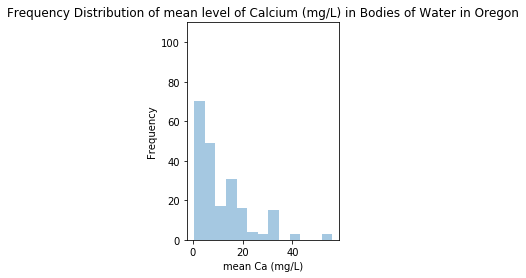

In [25]:
#Dissolved calcium relates to the risk of zebra mussels becoming established in a water body
plt.subplot(1, 2, 1)
plt.ylim(0,110)
sns.distplot(zmusselsor.mean_ca_mg_2009, kde=False)
plt.xlabel('mean Ca (mg/L)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of mean level of Calcium (mg/L) in Bodies of Water in Oregon')


Text(0.5,1,'Frequency Distribution of mean level of Calcium (mg/L) in Bodies of Water in Oregon')

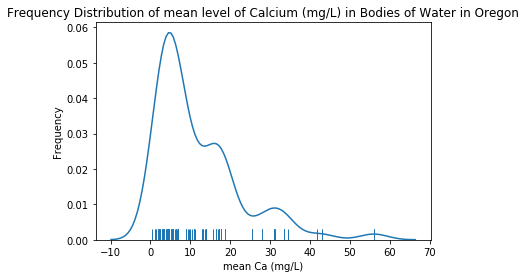

In [26]:
#density, rug, no hist
sns.distplot(zmusselsor.mean_ca_mg_2009, hist=False, rug=True)
plt.xlabel('mean Ca (mg/L)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of mean level of Calcium (mg/L) in Bodies of Water in Oregon')

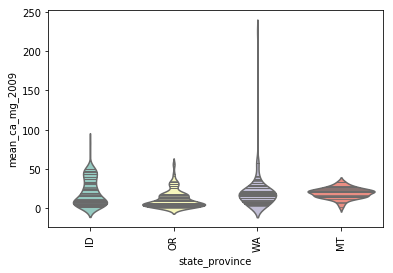

In [27]:
sns.violinplot(x="state_province", y="mean_ca_mg_2009", data=zmussels, split = True, 
               inner="stick", palette="Set3")
plt.xticks(rotation = 90);

### Choose two continuous variables, and plot them three different ways.

scatterplot, heat map

### Choose one continuous variable and one categorical variable, and plot them six different ways. Add box and whisker

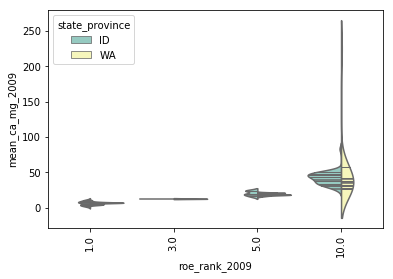

In [28]:
#Risk of establishment and mean dissolved calcium
sns.violinplot(x="roe_rank_2009", y="mean_ca_mg_2009", hue="state_province", data=zmwaid, split = True, 
               inner="stick", palette="Set3")
plt.xticks(rotation = 90);

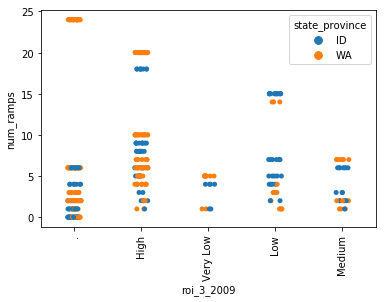

In [29]:
#The states of WA and ID provide data about the number of boat ramps
sns.stripplot(x="roi_3_2009", y="num_ramps", hue="state_province", data=zmwaid, jitter = True)
plt.xticks(rotation=90);

In [30]:
zmwaid.corr()

,crb,mean_ca_mg_2009,roe_rank_2009,roi_rank_2009,rank_sum_2009,num_trnmboats_2006_08,num_ramps
crb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_ca_mg_2009,NaN,1.000000,0.702670,0.054283,0.657716,0.021318,-0.037956
roe_rank_2009,NaN,0.702670,1.000000,0.142549,0.765541,0.003485,0.002383
roi_rank_2009,NaN,0.054283,0.142549,1.000000,0.796274,0.378594,0.185943
rank_sum_2009,NaN,0.657716,0.765541,0.796274,1.000000,0.188009,0.152591
num_trnmboats_2006_08,NaN,0.021318,0.003485,0.378594,0.188009,1.000000,0.054069
num_ramps,NaN,-0.037956,0.002383,0.185943,0.152591,0.054069,1.000000


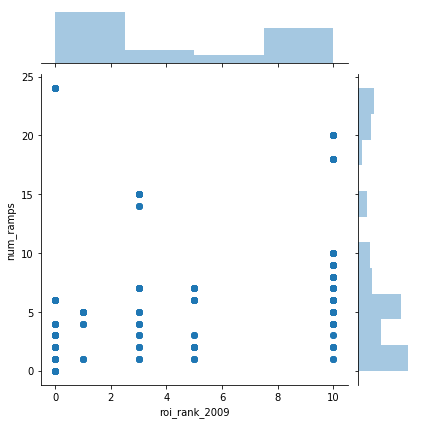

In [31]:
sns.jointplot(x="roi_rank_2009", y="num_ramps", data=zmwaid);

In [32]:
zmusselsid.corr()

,crb,mean_ca_mg_2009,roe_rank_2009,roi_rank_2009,rank_sum_2009,num_trnmboats_2006_08,num_ramps
crb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_ca_mg_2009,NaN,1.000000,0.937818,0.053365,0.696832,0.036676,-0.117420
roe_rank_2009,NaN,0.937818,1.000000,-0.019419,0.750322,0.003052,-0.151087
roi_rank_2009,NaN,0.053365,-0.019419,1.000000,0.687159,0.720626,0.473969
rank_sum_2009,NaN,0.696832,0.750322,0.687159,1.000000,0.487129,-0.162324
num_trnmboats_2006_08,NaN,0.036676,0.003052,0.720626,0.487129,1.000000,0.327993
num_ramps,NaN,-0.117420,-0.151087,0.473969,-0.162324,0.327993,1.000000


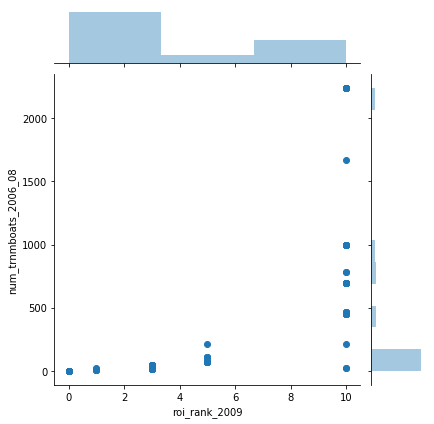

In [33]:
#Look at risk of introduction of zebra mussels and number of boats in fishing tournaments in 3 year prior (Idaho only
sns.jointplot(x="roi_rank_2009", y="num_trnmboats_2006_08", data=zmusselsid);